<a href="https://colab.research.google.com/github/Whanhoo/03MAIR-Algoritmos-de-Optimizacion/blob/main/AitorNogales_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad guida 2 (AG1)

Nombre: *Aitor Nogales Orue*

 URL: [https://colab.research.google.com/drive/1Zd-VvU1i4K435aj7792kgukGzq6pHxIB?usp=sharing](https://colab.research.google.com/drive/1Zd-VvU1i4K435aj7792kgukGzq6pHxIB?usp=sharing)

 GitHub: [https://github.com/Whanhoo/03MAIR-Algoritmos-de-Optimizacion.git](https://github.com/Whanhoo/03MAIR-Algoritmos-de-Optimizacion.git)

In [2]:
import math
import itertools

##Viaje por el rio
programacion dinamica 

In [3]:
tarifas = [
[0,5,4,3,9999,9999,9999],      #desde nodo 0
[9999,0,9999,2,3,9999,11],     #desde nodo 1
[9999,9999, 0,1,9999,4,10],    #desde nodo 2
[9999,9999,9999, 0,5,6,9],     #desde nodo 3
[9999,9999, 9999,9999,0,9999,4], #desde nodo 4
[9999,9999, 9999,9999,9999,0,3], #desde nodo 5
[9999,9999,9999,9999,9999,9999,0] #desde nodo 6
]
def precios_descenso_rio(matriz_tarifas):

  total_nodos = len(matriz_tarifas[0])

  #Inicialización de la tabla de precios
  precios = [ [9999]*total_nodos for i in [9999]*total_nodos]
  ruta = [ [""]*total_nodos for i in [""]*total_nodos]
  
  for i in range(total_nodos-1):
    for j in range(i+1, total_nodos):
      minimo = matriz_tarifas[i][j]
      ruta[i][j] = i
      
      for k in range(i, j):
        if precios[i][k] + matriz_tarifas[k][j] < minimo:
            minimo = min(minimo, precios[i][k] + matriz_tarifas[k][j] )
            ruta[i][j] = k
        precios[i][j] = minimo
        
  return precios,ruta

PRECIOS,RUTA = precios_descenso_rio(tarifas)  
print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(tarifas)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(tarifas)):
  print(RUTA[i]) 

def calcular_ruta(RUTA, desde, hasta):
  if desde == hasta:
    print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

11
PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 9999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 9999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


##Problema de Asignacion de tarea
Ramificacion y poda 

In [4]:
tabla_de_costes=[[11,12,18,40],
                 [14,15,13,22],
                 [11,17,19,23],
                 [17,14,20,28]]

def calcular_valor(solucion_parcial,tabla_coste):
  valor = 0
  for i in range(len(solucion_parcial)):
    valor += tabla_coste[solucion_parcial[i]][i] 
  return valor
  
calcular_valor((0, 1, 2, 3),tabla_de_costes)

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CS((0,1),tabla_de_costes)

def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

def ramificacion_y_poda(COSTES):

  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = calcular_valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(tabla_de_costes)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


In [12]:
def fuerza_bruta(tabla_de_costes):
  resultado=99999
  solucion=()
  for s in list(itertools.permutations(range(len(tabla_de_costes)))):
    temp=calcular_valor(s,tabla_de_costes)
    if temp<resultado:
      resultado=temp
      solucion=s
  return resultado,solucion
fuerza_bruta(tabla_de_costes)

(61, (0, 3, 1, 2))

el algoritmo de fuerza bruta tiene una complejidad de O(!n)

In [14]:
import random
def random_matriz_cuadrada(n):
  matriz = [list(range(1 + n * i, 1 + n * (i + 1))) for i in range(n)]
  for i in range(n):
    for j in range(n):
     matriz[i][j]= random.randint(0,20)
  return matriz

for i in range(5,15):
  A = random_matriz_cuadrada(i)
  print(fuerza_bruta(A))
  ramificacion_y_poda(A)

(30, (0, 3, 1, 2, 4))
La solucion final es: [{'s': (0, 2, 3, 1, 4), 'ci': 30}]  en  13  iteraciones  para dimension:  5
(22, (1, 0, 2, 5, 3, 4))
La solucion final es: [{'s': (1, 0, 4, 2, 5, 3), 'ci': 22}]  en  206  iteraciones  para dimension:  6
(21, (5, 4, 0, 3, 2, 1, 6))
La solucion final es: [{'s': (0, 5, 6, 1, 3, 2, 4), 'ci': 27}]  en  111  iteraciones  para dimension:  7
(29, (5, 1, 0, 7, 2, 6, 3, 4))
La solucion final es: [{'s': (2, 1, 3, 6, 7, 0, 5, 4), 'ci': 31}]  en  338  iteraciones  para dimension:  8
(21, (0, 6, 5, 8, 7, 3, 1, 4, 2))
La solucion final es: [{'s': (3, 6, 1, 5, 8, 2, 0, 4, 7), 'ci': 34}]  en  8254  iteraciones  para dimension:  9
(15, (0, 4, 5, 9, 8, 2, 7, 1, 6, 3))
La solucion final es: [{'s': (0, 7, 5, 9, 1, 2, 8, 6, 4, 3), 'ci': 15}]  en  470  iteraciones  para dimension:  10


KeyboardInterrupt: ignored

fuerza bruta deja de ser una opcion a partir de n>10 ya que se cosume toda la ran disponible

aparentemente el limite de ramificacion y poda esta para n>14

##Descenso del gradiente

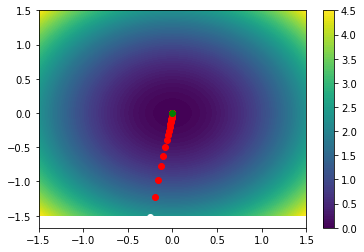

Solucion: [-8.674318978911767e-50, -5.352085511789493e-49] 2.9397257422986087e-97


In [7]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
import random

#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2+X[1]**2      #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=1.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA=.1 

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))